# Predicting Survival from Titanic Dataset

In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
#Importing csv data
df = pd.read_csv('titanic1.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Unnamed: 8,Unnamed: 9
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0,7.2500,NaN,NaN
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0,71.2833,NaN,NaN
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0,7.9250,NaN,NaN
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0,53.1000,NaN,NaN
4,0,3.0,Mr. William Henry Allen,male,35.0,0.0,0,8.0500,NaN,0.0


In [3]:
#Dropping columns which are not correlated to surival 
#cleaning data

cols_to_drop = ['Name','Unnamed: 8', 'Unnamed: 9']
df = df.drop(cols_to_drop, axis=1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,male,22.0,1.0,0,7.2500
1,1,1.0,female,38.0,1.0,0,71.2833
2,1,3.0,female,26.0,0.0,0,7.9250
3,1,1.0,female,35.0,1.0,0,53.1000
4,0,3.0,male,35.0,0.0,0,8.0500


<AxesSubplot:>

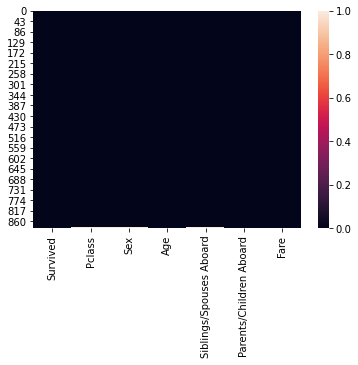

In [4]:
#Checking if there are any Nulls in our dataset using seaborn
sb.heatmap(df.isnull())

In [5]:
#On checking the dataset I have found that there is a summary of dataset at the end. Hence dropping those row values
df = df.dropna() 

In [6]:
#Converting the string values in Sex column into codes
df['Sex'] = df.Sex.astype('category').cat.codes
df.dtypes

Survived                    object
Pclass                     float64
Sex                           int8
Age                        float64
Siblings/Spouses Aboard    float64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [7]:
#Splitting the dataframe into features and target
x = df.iloc[:,1:]
y = df.iloc[:,0:1]

In [8]:
#Splitting the dataset into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=1)

# Logistic Regression Classifier

In [9]:
from sklearn.linear_model import LogisticRegression

#Scoring different Logistic classifier solvers
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solvers:
    lg_regg = LogisticRegression(solver = i, max_iter=10000)
    lg_regg.fit(x_train,y_train.values.ravel())
    print('Score for logistic solver = {} is {}'.format(i,lg_regg.score(x_test,y_test)))

Score for logistic solver = newton-cg is 0.797752808988764
Score for logistic solver = lbfgs is 0.797752808988764
Score for logistic solver = liblinear is 0.797752808988764
Score for logistic solver = sag is 0.797752808988764
Score for logistic solver = saga is 0.7865168539325843


# Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
#Scoring Random forest classifier for different n_estimator values
for i in range(25,500,25):
    rf_class = RandomForestClassifier(n_estimators=i)
    rf_class.fit(x_train,y_train.values.ravel())
    print('Score for n_estimators = {} is {}'.format(i,rf_class.score(x_test,y_test)))

Score for n_estimators = 25 is 0.7752808988764045
Score for n_estimators = 50 is 0.8202247191011236
Score for n_estimators = 75 is 0.8202247191011236
Score for n_estimators = 100 is 0.797752808988764
Score for n_estimators = 125 is 0.8314606741573034
Score for n_estimators = 150 is 0.797752808988764
Score for n_estimators = 175 is 0.8314606741573034
Score for n_estimators = 200 is 0.8202247191011236
Score for n_estimators = 225 is 0.8202247191011236
Score for n_estimators = 250 is 0.8314606741573034
Score for n_estimators = 275 is 0.8314606741573034
Score for n_estimators = 300 is 0.8314606741573034
Score for n_estimators = 325 is 0.8314606741573034
Score for n_estimators = 350 is 0.8314606741573034
Score for n_estimators = 375 is 0.8314606741573034
Score for n_estimators = 400 is 0.8314606741573034
Score for n_estimators = 425 is 0.8426966292134831
Score for n_estimators = 450 is 0.8426966292134831
Score for n_estimators = 475 is 0.8426966292134831


# Support Vector Machine Classifier

In [11]:
from sklearn.svm import SVC
#Trying SVM classifier and scoring
svc_class = SVC(probability=True, kernel='linear')
svc_class.fit(x_train,y_train.values.ravel())
svc_class.score(x_test,y_test)

0.8202247191011236

# Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
#Scoring Decision Tree classifier for different max_depth values
for i in range(1,8):
    dt_class = DecisionTreeClassifier(max_depth=i)
    dt_class.fit(x_train,y_train.values.ravel())
    print('Score for max_depth = {} is {}'.format(i,dt_class.score(x_test,y_test)))

Score for max_depth = 1 is 0.8202247191011236
Score for max_depth = 2 is 0.7528089887640449
Score for max_depth = 3 is 0.8764044943820225
Score for max_depth = 4 is 0.8314606741573034
Score for max_depth = 5 is 0.8651685393258427
Score for max_depth = 6 is 0.8089887640449438
Score for max_depth = 7 is 0.8539325842696629


# Conclusion: 
Decision Tree with max_depth = 3 gives 87% Accuracy

In [13]:
dt_class = DecisionTreeClassifier(max_depth=3)
dt_class.fit(x_train,y_train.values.ravel())
dt_class.score(x_test,y_test)

0.8764044943820225